In [11]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
sizes = dict()

for root, dirs, files in os.walk("data", topdown=False):
    for name in files:
        if name.split('.')[1] == 'jpeg':
            path = os.path.join(root, name)
            imarr = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            shape = imarr.shape
            if shape in sizes:
                sizes[shape] += 1
            else:
                sizes[shape] = 1

In [3]:
count = 0
average = np.array([0, 0])
for key in sizes:
    val = sizes[key]
    count += val
    average[0] += key[0] * val
    average[1] += key[1] * val
average = average / count

In [4]:
average / 2

array([485.34451844, 663.94040301])

In [8]:
test = 'data/chest_xray/train/PNEUMONIA/person1922_bacteria_4830.jpeg'
imarr = cv2.imread(test, cv2.IMREAD_GRAYSCALE)
np.max(imarr)

255

Found 5216 images belonging to 2 classes.
True


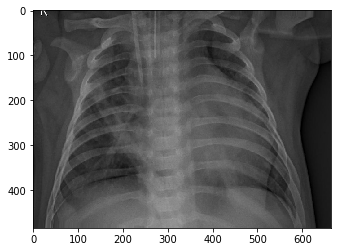

In [35]:
BASE_PATH = 'data/chest_xray/'
TRAIN_PATH = BASE_PATH + 'train'

WIDTH, HEIGHT, CHANNELS = (664, 485, 1)
COLOR_MODE='rgb'
BATCH_SIZE=10

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=10,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(HEIGHT, WIDTH),
    color_mode=COLOR_MODE,
    class_mode='categorical',
    batch_size=BATCH_SIZE)

x,y = train_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    r = image[:, :, 0]
    g = image[:, :, 1]
    b = image[:, :, 2]
    print((r==b).all())